In [1]:
##creating a model to classify different types of bird species aroung the globe
#i will be using CNN to create the model
#credit to kaggle for the dataset..link...

In [2]:
#import important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas
import cv2
import PIL
import os
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
#loading the dataset and transforming it into a pathlib for easy access
train_dir=pathlib.Path('C://Users/sojore/Documents/Bird species/train_b')
train_dir

WindowsPath('C:/Users/sojore/Documents/Bird species/train_b')

WindowsPath('C:/Users/sojore/Documents/Bird species/train_b')

In [4]:
list(train_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/003.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/006.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/007.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/008.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/009.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/017.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/018.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/019.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/020.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/021.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b

[WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/003.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/006.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/007.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/008.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/009.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/017.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/018.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/019.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/020.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AFRICAN_CROWNED_CRANE/021.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b

In [5]:
len(list(train_dir.glob('*/*.jpg')))

600

600

In [6]:
##so if i wanna get only the AMERICAN GOLDFINCH images i do the following
AMERICAN_GOLDFINCH=list(train_dir.glob('AMERICAN_GOLDFINCH/*'))
AMERICAN_GOLDFINCH[:5]

[WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/001.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/002.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/003.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/004.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/005.jpg')]

[WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/001.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/002.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/003.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/004.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/AMERICAN_GOLDFINCH/005.jpg')]

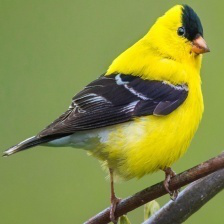

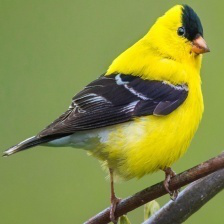

In [7]:
##so we wanna show all the above images using the pillow module
#we use the command below to show images in PIL
PIL.Image.open(str(AMERICAN_GOLDFINCH[0]))

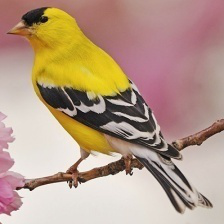

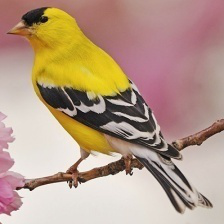

In [8]:
PIL.Image.open(str(AMERICAN_GOLDFINCH[8]))

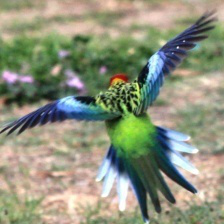

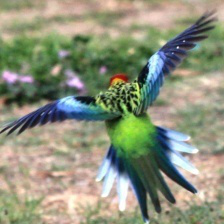

In [9]:
EASTERN_ROSELLA=list(train_dir.glob('EASTERN_ROSELLA/*'))
PIL.Image.open(EASTERN_ROSELLA[5])

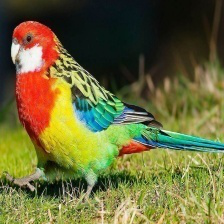

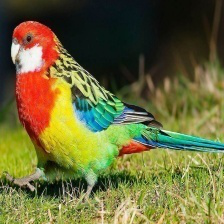

In [10]:
PIL.Image.open(EASTERN_ROSELLA[9])

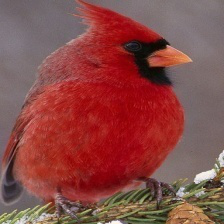

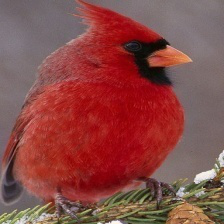

In [11]:
NORTHERN_CARDINAL=list(train_dir.glob('NORTHERN_CARDINAL/*'))
PIL.Image.open(NORTHERN_CARDINAL[18])

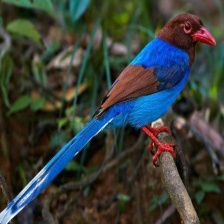

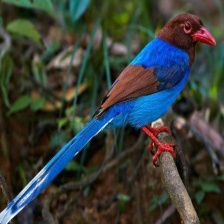

In [12]:
SRI_LANKA_BLUE_MAGPIE=list(train_dir.glob('SRI_LANKA_BLUE_MAGPIE/*'))
PIL.Image.open(SRI_LANKA_BLUE_MAGPIE[18])

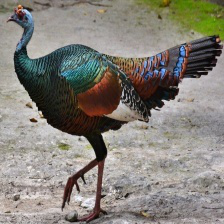

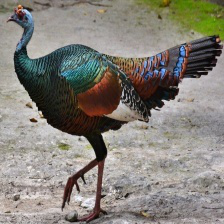

In [13]:
OCELLATED_TURKEY=list(train_dir.glob('OCELLATED_TURKEY/*'))
PIL.Image.open(OCELLATED_TURKEY[15])

In [14]:
#now i will create a bird species dictionary containing all paths to different types of bird species
#this will give all the paths of the bird images

In [15]:
bird_images_dict={
     'AFRICAN_CROWNED_CRANE':list(train_dir.glob('AFRICAN_CROWNED_CRANE/*')),
    'AMERICAN_GOLDFINCH':list(train_dir.glob('AMERICAN_GOLDFINCH/*')),
    'AMERICAN_REDSTART':list(train_dir.glob('AMERICAN_REDSTART/*')),
    'ANHINGA':list(train_dir.glob('ANHINGA/*')),
    'BALI_STARLING':list(train_dir.glob('BALI_STARLING/*')),
    'CANARY':list(train_dir.glob('CANARY/*')),
    'DOUBLE_BARRED_FINCH':list(train_dir.glob('DOUBLE_BARRED_FINCH/*')),
    'EASTERN_ROSELLA':list(train_dir.glob('EASTERN_ROSELLA/*')),
    'FRIGATE':list(train_dir.glob('FRIGATE/*')),
    'HOOPOES':list(train_dir.glob('HOOPOES/*')),
    'INDIAN_BUSTARD':list(train_dir.glob('INDIAN_BUSTARD/*')),
    'JABIRU':list(train_dir.glob('JABIRU/*')),
    'LILAC_ROLLER':list(train_dir.glob('LILAC_ROLLER/*')),
    'NORTHERN_CARDINAL':list(train_dir.glob('NORTHERN_CARDINAL/*')),
    'NORTHERN_PARULA':list(train_dir.glob('NORTHERN_PARULA/*')),
    'OCELLATED_TURKEY':list(train_dir.glob('OCELLATED_TURKEY/*')),
    'PARADISE_TANAGER':list(train_dir.glob('PARADISE_TANAGER/*')),
    'RUBY_THROATED_HUMMINGBIRD':list(train_dir.glob('RUBY_THROATED_HUMMINGBIRD/*')),
    'SRI_LANKA_BLUE_MAGPIE':list(train_dir.glob('SRI_LANKA_BLUE_MAGPIE/*')),
    'TOUCHAN':list(train_dir.glob('TOUCHAN/*'))
}

In [16]:
bird_images_dict['TOUCHAN']

[WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/001.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/002.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/003.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/004.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/005.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/006.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/007.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/008.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/009.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/010.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/011.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/012.jpg'),
 WindowsPath('C:/Users/sojore/Documents/

[WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/001.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/002.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/003.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/004.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/005.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/006.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/007.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/008.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/009.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/010.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/011.jpg'),
 WindowsPath('C:/Users/sojore/Documents/Bird species/train_b/TOUCHAN/012.jpg'),
 WindowsPath('C:/Users/sojore/Documents/

In [17]:
#i will also create bird species labels dictionary as below
birds_labels_dict={
    'AFRICAN_CROWNED_CRANE':0,
    'AMERICAN_GOLDFINCH':1, 'AMERICAN_REDSTART':2,
    'ANHINGA':3,
    'BALI_STARLING':4,
    'CANARY':5,
    'DOUBLE_BARRED_FINCH':6,'EASTERN_ROSELLA':7,'FRIGATE':8,
    'HOOPOES':9,'INDIAN_BUSTARD':10,'JABIRU':11,
    'LILAC_ROLLER':12,'NORTHERN_CARDINAL':13,
    'NORTHERN_PARULA':14,'OCELLATED_TURKEY':15,
    'PARADISE_TANAGER':16,'RUBY_THROATED_HUMMINGBIRD':17,
    'SRI_LANKA_BLUE_MAGPIE':18,'TOUCHAN':19
}

In [18]:
#we can use the open cv module to read these files into an open cv object(sort of like a numpy array)
str(bird_images_dict['DOUBLE_BARRED_FINCH'][1])

'C:\\Users\\sojore\\Documents\\Bird species\\train_b\\DOUBLE_BARRED_FINCH\\002.jpg'

'C:\\Users\\sojore\\Documents\\Bird species\\train_b\\DOUBLE_BARRED_FINCH\\002.jpg'

In [19]:
str(bird_images_dict['RUBY_THROATED_HUMMINGBIRD'][11])

'C:\\Users\\sojore\\Documents\\Bird species\\train_b\\RUBY_THROATED_HUMMINGBIRD\\012.jpg'

'C:\\Users\\sojore\\Documents\\Bird species\\train_b\\RUBY_THROATED_HUMMINGBIRD\\012.jpg'

In [20]:
img=cv2.imread(str(bird_images_dict['RUBY_THROATED_HUMMINGBIRD'][5]))
img.shape

(224, 224, 3)

(224, 224, 3)

In [21]:
img

array([[[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [ 24, 162, 238],
        [ 25, 162, 242],
        [ 24, 163, 243]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [ 27, 165, 242],
        [ 26, 165, 245],
        [ 27, 166, 246]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [ 30, 167, 247],
        [ 29, 167, 249],
        [ 29, 167, 249]],

       ...,

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [236, 223, 249],
        [237, 223, 251],
        [236, 222, 250]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [235, 222, 248],
        [236, 222, 250],
        [235, 221, 249]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [235, 222, 248],
        [235, 221, 249],
        [234, 220, 248]]

array([[[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [ 24, 162, 238],
        [ 25, 162, 242],
        [ 24, 163, 243]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [ 27, 165, 242],
        [ 26, 165, 245],
        [ 27, 166, 246]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [ 30, 167, 247],
        [ 29, 167, 249],
        [ 29, 167, 249]],

       ...,

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [236, 223, 249],
        [237, 223, 251],
        [236, 222, 250]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [235, 222, 248],
        [236, 222, 250],
        [235, 221, 249]],

       [[ 29, 148, 247],
        [ 29, 148, 247],
        [ 29, 148, 247],
        ...,
        [235, 222, 248],
        [235, 221, 249],
        [234, 220, 248]]

In [22]:
#our images have a standard dimension of 224*224*3
#we gonna create our X and y
X,y=[],[]

for bird_name,image in bird_images_dict.items():
    for imag in image:
        img=cv2.imread(str(imag))
        resized_img=cv2.resize(img,(224,224))#making sure that the images are well resized to the same dimension
        X.append(resized_img)
        y.append(birds_labels_dict[bird_name])#this code i will get the number for each fruit name
        

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [24]:
#our images have a standard dimension of 224*224*3
#we gonna create our X_train and y_train
# X_train,y_train=[],[]

# for bird_name,image in bird_images_dict.items():
#     for imag in image:
#         img=cv2.imread(str(imag))
#         resized_img=cv2.resize(img,(224,224))#making sure that the images are well resized to the same dimension
#         X_train.append(resized_img)
#         y_train.append(birds_labels_dict[bird_name])#this code i will get the number for each fruit name
        

In [25]:
##converting my X_train and y_train into a numpy array
X_train=np.array(X_train)
y_train=np.array(y_train)

In [26]:
X_train[0]

array([[[116, 149, 188],
        [118, 150, 186],
        [123, 151, 186],
        ...,
        [237, 191, 150],
        [237, 191, 150],
        [237, 191, 150]],

       [[117, 148, 187],
        [119, 148, 185],
        [123, 149, 185],
        ...,
        [237, 191, 150],
        [237, 191, 150],
        [237, 191, 150]],

       [[119, 148, 185],
        [121, 149, 184],
        [126, 151, 185],
        ...,
        [237, 191, 150],
        [237, 191, 150],
        [237, 191, 150]],

       ...,

       [[105, 121, 128],
        [103, 121, 128],
        [103, 121, 128],
        ...,
        [208, 190, 159],
        [205, 189, 160],
        [201, 187, 158]],

       [[103, 120, 129],
        [100, 119, 127],
        [ 98, 116, 127],
        ...,
        [205, 187, 156],
        [203, 188, 156],
        [200, 187, 155]],

       [[ 99, 118, 126],
        [ 97, 116, 124],
        [ 92, 111, 124],
        ...,
        [201, 183, 152],
        [204, 189, 157],
        [200, 187, 155]]

array([[[116, 149, 188],
        [118, 150, 186],
        [123, 151, 186],
        ...,
        [237, 191, 150],
        [237, 191, 150],
        [237, 191, 150]],

       [[117, 148, 187],
        [119, 148, 185],
        [123, 149, 185],
        ...,
        [237, 191, 150],
        [237, 191, 150],
        [237, 191, 150]],

       [[119, 148, 185],
        [121, 149, 184],
        [126, 151, 185],
        ...,
        [237, 191, 150],
        [237, 191, 150],
        [237, 191, 150]],

       ...,

       [[105, 121, 128],
        [103, 121, 128],
        [103, 121, 128],
        ...,
        [208, 190, 159],
        [205, 189, 160],
        [201, 187, 158]],

       [[103, 120, 129],
        [100, 119, 127],
        [ 98, 116, 127],
        ...,
        [205, 187, 156],
        [203, 188, 156],
        [200, 187, 155]],

       [[ 99, 118, 126],
        [ 97, 116, 124],
        [ 92, 111, 124],
        ...,
        [201, 183, 152],
        [204, 189, 157],
        [200, 187, 155]]

In [27]:
X_train.shape

(480, 224, 224, 3)

(480, 224, 224, 3)

In [28]:
##we do a similar operation on the test dataset

In [29]:
#loadig the test dataset into a pathlib
test_dir=pathlib.Path('C://Users/sojore/Documents/Bird species/test_b')
test_dir

WindowsPath('C:/Users/sojore/Documents/Bird species/test_b')

WindowsPath('C:/Users/sojore/Documents/Bird species/test_b')

In [30]:
len(list(test_dir.glob('*/*.jpg')))

100

100

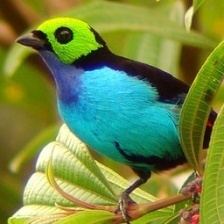

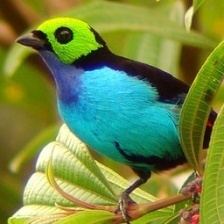

In [31]:
PARADISE_TANAGER=list(test_dir.glob('PARADISE_TANAGER/*'))
PIL.Image.open(PARADISE_TANAGER[3])

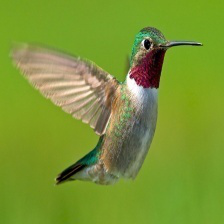

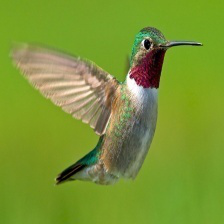

In [32]:
RUBY_THROATED_HUMMINGBIRD=list(test_dir.glob('RUBY_THROATED_HUMMINGBIRD/*'))
PIL.Image.open(RUBY_THROATED_HUMMINGBIRD[1])

In [33]:
##creating a test data dictionary on the test dataset
# bird_images_dict_test={
#      'AFRICAN_CROWNED_CRANE':list(test_dir.glob('AFRICAN_CROWNED_CRANE/*')),
#     'AMERICAN_GOLDFINCH':list(test_dir.glob('AMERICAN_GOLDFINCH/*')),
#     'AMERICAN_REDSTART':list(test_dir.glob('AMERICAN_REDSTART/*')),
#     'ANHINGA':list(test_dir.glob('ANHINGA/*')),
#     'BALI_STARLING':list(test_dir.glob('BALI_STARLING/*')),
#     'CANARY':list(test_dir.glob('CANARY/*')),
#     'DOUBLE_BARRED_FINCH':list(test_dir.glob('DOUBLE_BARRED_FINCH/*')),
#     'EASTERN_ROSELLA':list(test_dir.glob('EASTERN_ROSELLA/*')),
#     'FRIGATE':list(test_dir.glob('FRIGATE/*')),
#     'HOOPOES':list(test_dir.glob('HOOPOES/*')),
#     'INDIAN_BUSTARD':list(test_dir.glob('INDIAN_BUSTARD/*')),
#     'JABIRU':list(test_dir.glob('JABIRU/*')),
#     'LILAC_ROLLER':list(test_dir.glob('LILAC_ROLLER/*')),
#     'NORTHERN_CARDINAL':list(test_dir.glob('NORTHERN_CARDINAL/*')),
#     'NORTHERN_PARULA':list(test_dir.glob('NORTHERN_PARULA/*')),
#     'OCELLATED_TURKEY':list(test_dir.glob('OCELLATED_TURKEY/*')),
#     'PARADISE_TANAGER':list(test_dir.glob('PARADISE_TANAGER/*')),
#     'RUBY_THROATED_HUMMINGBIRD':list(test_dir.glob('RUBY_THROATED_HUMMINGBIRD/*')),
#     'SRI_LANKA_BLUE_MAGPIE':list(test_dir.glob('SRI_LANKA_BLUE_MAGPIE/*')),
#     'TOUCHAN':list(test_dir.glob('TOUCHAN/*'))
# }

In [34]:
#i will also create bird species labels dictionary on the test datase as below
# birds_labels_dict_test={
#     'AFRICAN_CROWNED_CRANE':20,
#     'AMERICAN_GOLDFINCH':21, 'AMERICAN_REDSTART':22,
#     'ANHINGA':23,
#     'BALI_STARLING':24,
#     'CANARY':25,
#     'DOUBLE_BARRED_FINCH':26,'EASTERN_ROSELLA':27,'FRIGATE':28,
#     'HOOPOES':29,'INDIAN_BUSTARD':30,'JABIRU':31,
#     'LILAC_ROLLER':32,'NORTHERN_CARDINAL':33,
#     'NORTHERN_PARULA':34,'OCELLATED_TURKEY':35,
#     'PARADISE_TANAGER':36,'RUBY_THROATED_HUMMINGBIRD':37,
#     'SRI_LANKA_BLUE_MAGPIE':38,'TOUCHAN':39
# }

In [35]:
# img1=cv2.imread(str(bird_images_dict_test['INDIAN_BUSTARD'][3]))
# img1.shape

In [36]:
# img1

In [37]:
#our images have a standard dimension of 224*224*3
#we gonna create our X_test and y_test
# X_test,y_test=[],[]

# for bird_name,image in bird_images_dict_test.items():
#     for imag in image:
#         img=cv2.imread(str(imag))
#         resized_img=cv2.resize(img,(224,224))#making sure that the images are well resized to the same dimension
#         X_test.append(resized_img)
#         y_test.append(birds_labels_dict_test[bird_name])#this code i will get the number for each fruit name

In [38]:
##converting X_test and y_test into a numpy array
X_test=np.array(X_test)
y_test=np.array(y_test)

In [39]:
len(X_test)

120

120

In [40]:
X_test[4]

array([[[ 91,  95,  84],
        [ 92,  96,  85],
        [ 94,  95,  85],
        ...,
        [ 94,  95,  86],
        [ 95,  94,  84],
        [ 93,  92,  82]],

       [[ 88,  92,  81],
        [ 88,  92,  81],
        [ 90,  91,  81],
        ...,
        [ 92,  93,  84],
        [ 92,  93,  83],
        [ 92,  93,  83]],

       [[ 88,  92,  81],
        [ 88,  92,  81],
        [ 87,  91,  80],
        ...,
        [ 89,  92,  83],
        [ 90,  94,  83],
        [ 91,  95,  84]],

       ...,

       [[154, 166, 168],
        [153, 165, 167],
        [153, 162, 165],
        ...,
        [ 30,  24,  19],
        [ 67,  62,  59],
        [116, 112, 111]],

       [[152, 161, 164],
        [151, 160, 163],
        [150, 160, 160],
        ...,
        [ 27,  21,  16],
        [ 26,  21,  18],
        [ 78,  73,  72]],

       [[149, 158, 161],
        [149, 158, 161],
        [148, 158, 158],
        ...,
        [ 42,  36,  31],
        [ 33,  28,  25],
        [ 37,  32,  31]]

array([[[ 91,  95,  84],
        [ 92,  96,  85],
        [ 94,  95,  85],
        ...,
        [ 94,  95,  86],
        [ 95,  94,  84],
        [ 93,  92,  82]],

       [[ 88,  92,  81],
        [ 88,  92,  81],
        [ 90,  91,  81],
        ...,
        [ 92,  93,  84],
        [ 92,  93,  83],
        [ 92,  93,  83]],

       [[ 88,  92,  81],
        [ 88,  92,  81],
        [ 87,  91,  80],
        ...,
        [ 89,  92,  83],
        [ 90,  94,  83],
        [ 91,  95,  84]],

       ...,

       [[154, 166, 168],
        [153, 165, 167],
        [153, 162, 165],
        ...,
        [ 30,  24,  19],
        [ 67,  62,  59],
        [116, 112, 111]],

       [[152, 161, 164],
        [151, 160, 163],
        [150, 160, 160],
        ...,
        [ 27,  21,  16],
        [ 26,  21,  18],
        [ 78,  73,  72]],

       [[149, 158, 161],
        [149, 158, 161],
        [148, 158, 158],
        ...,
        [ 42,  36,  31],
        [ 33,  28,  25],
        [ 37,  32,  31]]

In [41]:
##next up we do scalling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [42]:
X_train_scaled[0]

array([[[0.45490196, 0.58431373, 0.7372549 ],
        [0.4627451 , 0.58823529, 0.72941176],
        [0.48235294, 0.59215686, 0.72941176],
        ...,
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529]],

       [[0.45882353, 0.58039216, 0.73333333],
        [0.46666667, 0.58039216, 0.7254902 ],
        [0.48235294, 0.58431373, 0.7254902 ],
        ...,
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529]],

       [[0.46666667, 0.58039216, 0.7254902 ],
        [0.4745098 , 0.58431373, 0.72156863],
        [0.49411765, 0.59215686, 0.7254902 ],
        ...,
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529]],

       ...,

       [[0.41176471, 0.4745098 , 0.50196078],
        [0.40392157, 0.4745098 , 0.50196078],
        [0.40392157, 0

array([[[0.45490196, 0.58431373, 0.7372549 ],
        [0.4627451 , 0.58823529, 0.72941176],
        [0.48235294, 0.59215686, 0.72941176],
        ...,
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529]],

       [[0.45882353, 0.58039216, 0.73333333],
        [0.46666667, 0.58039216, 0.7254902 ],
        [0.48235294, 0.58431373, 0.7254902 ],
        ...,
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529]],

       [[0.46666667, 0.58039216, 0.7254902 ],
        [0.4745098 , 0.58431373, 0.72156863],
        [0.49411765, 0.59215686, 0.7254902 ],
        ...,
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529],
        [0.92941176, 0.74901961, 0.58823529]],

       ...,

       [[0.41176471, 0.4745098 , 0.50196078],
        [0.40392157, 0.4745098 , 0.50196078],
        [0.40392157, 0

In [43]:
##now we are ready to build our model using CNN

In [44]:
##now we gonna apply this data augmentation to generate new samples to better train our model
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [45]:
num_classes=10
model=Sequential([
    #data_augmentation,
#     layers.Conv2D(16,3,padding='same',activation='relu'),
#     layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    #add Dense network
    layers.Flatten(),
    layers.Dense(220,activation='sigmoid'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=2)

Epoch 1/2
Epoch 1/2
15/15 [==============================] - 293s 12s/step - loss: -42.1180 - accuracy: 0.0417
Epoch 2/2
Epoch 2/2
15/15 [==============================] - 188s 13s/step - loss: -47.2884 - accuracy: 0.0458


In [46]:
#the above model performance can be improved by training the model on a huge dataset
#running more epochs ..works pretty fast on a GPU